# Plot

In [3]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.colors import LogNorm
from auxPlots import interpolateData
import itertools
import pyslha

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [43]:
masses_widths = []
for f in glob.glob('../data/slhaFiles/*.slha'):
    data = pyslha.readSLHAFile(f)
    mst = data.blocks['MASS'][5000002]
    mdm = data.blocks['MASS'][5000012]
    w = data.decays[5000002].totalwidth
    masses_widths.append([mdm,mst,w])

for f in glob.glob('../processFolders/pp2STST_smodels_width/Events/run_*/*.slha'):
    data = pyslha.readSLHAFile(f)
    mst = data.blocks['MASS'][5000002]
    mdm = data.blocks['MASS'][5000012]
    w = data.decays[5000002].totalwidth
    masses_widths.append([mdm,mst,w])



In [44]:
masses_widths = np.array(masses_widths)

In [45]:
xnew,ynew,znew = interpolateData(masses_widths[:,1],masses_widths[:,1]-masses_widths[:,0],(2e-16/masses_widths[:,2])*1e3)

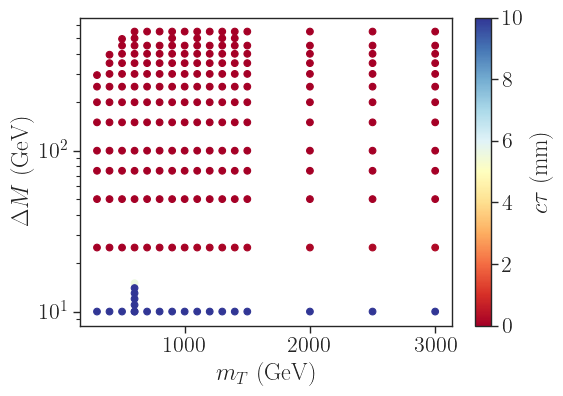

In [46]:
plt.figure(figsize=(6,4))
x = masses_widths[:,1]
y = masses_widths[:,1]-masses_widths[:,0]
z = (2e-16/masses_widths[:,2])*1e3
plt.scatter(x,y,c=z,cmap=cm,vmin=0,vmax=10)
plt.colorbar(label=r'$c \tau$ (mm)')
plt.yscale('log')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.show()

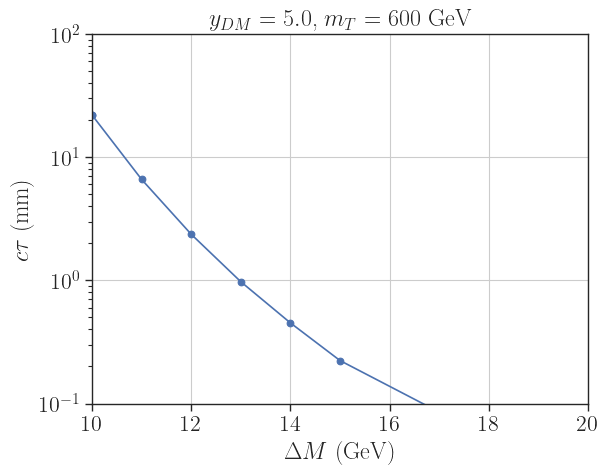

In [51]:
yDM = 5.0
mT = 600.
pts = np.array([x for x in masses_widths if (x[1] == mT and x[0] > mT-100.0)])
pts = np.array(sorted(pts, key = lambda pt: pt[0],reverse=True))
plt.plot(pts[:,1]-pts[:,0],(2e-16/(yDM**2*pts[:,2]))*1e3)
plt.scatter(pts[:,1]-pts[:,0],(2e-16/(yDM**2*pts[:,2]))*1e3)
plt.xlim(10.,20.)
plt.ylim(1e-1,100.)
plt.yscale('log')
plt.xlabel(r'$\Delta M$ (GeV)')
plt.ylabel(r'$c \tau$ (mm)')
# plt.xticks(np.arange(10.,20.,1.))
plt.grid()
plt.title(r'$y_{DM} = %1.1f$, $m_T = %1.0f$ GeV' %(yDM,mT))
plt.show()